In [1]:
# Using Conv Nets to classify iamges
# There are 5 categories: arctic fox, earless seal, penguin, polar bear, snow leopard
# Each class has around 400 images in total
# The data are split into training set (80%), validation set (10%), and test set (10%)
# The model uses transfer learning from VGG16.

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [5]:
base_dir = 'E:/pictures splited'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [6]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [7]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,5))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 1583)

Found 1583 images belonging to 5 classes.


C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
validation_features, validation_labels = extract_features(validation_dir, 400)

Found 400 images belonging to 5 classes.


In [9]:
train_features = np.reshape(train_features, (1583, 4 * 4 * 512))


In [13]:
validation_features = np.reshape(validation_features, (400, 4 * 4 * 512))

In [14]:
from keras import models
from keras import layers
from keras import optimizers

In [15]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

In [16]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
80/80 [==============================] - 2s 19ms/step - loss: 1.5848 - accuracy: 0.3449 - val_loss: 1.2206 - val_accuracy: 0.5900
Epoch 2/30
80/80 [==============================] - 1s 18ms/step - loss: 1.1944 - accuracy: 0.5262 - val_loss: 0.9966 - val_accuracy: 0.6750
Epoch 3/30
80/80 [==============================] - 1s 18ms/step - loss: 0.9546 - accuracy: 0.6494 - val_loss: 0.8648 - val_accuracy: 0.7025
Epoch 4/30
80/80 [==============================] - 1s 18ms/step - loss: 0.8208 - accuracy: 0.7006 - val_loss: 0.7819 - val_accuracy: 0.7200
Epoch 5/30
80/80 [==============================] - 1s 18ms/step - loss: 0.7176 - accuracy: 0.7511 - val_loss: 0.7388 - val_accuracy: 0.7375
Epoch 6/30
80/80 [==============================] - 1s 18ms/step - loss: 0.6518 - accuracy: 0.7682 - val_loss: 0.6823 - val_accuracy: 0.7675
Epoch 7/30
80/80 [==============================] - 1s 18ms/step - loss: 0.5955 - accuracy: 0.7953 - val_loss: 0.6594 - val_accuracy: 0.7800
Epoch 8/30
80

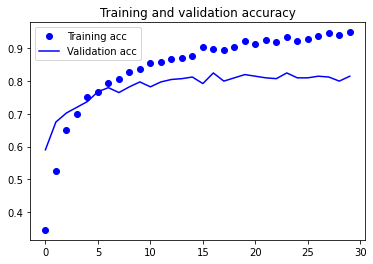

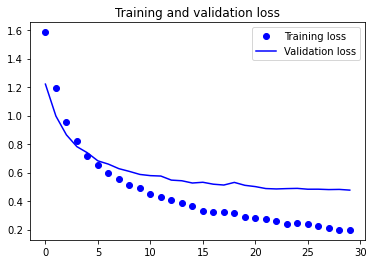

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()